In [23]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
import keras
from sklearn.metrics import confusion_matrix , classification_report, precision_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
from sklearn.metrics import classification_report
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Unzip the DataSet**

In [24]:
!unzip '/content/drive/MyDrive/ML Final/CNN_dataset.zip'

Streaming output truncated to the last 5000 lines.
 extracting: CNN_dataset/HeadCT/005000.jpeg  
 extracting: CNN_dataset/HeadCT/005001.jpeg  
 extracting: CNN_dataset/HeadCT/005002.jpeg  
 extracting: CNN_dataset/HeadCT/005003.jpeg  
  inflating: CNN_dataset/HeadCT/005004.jpeg  
 extracting: CNN_dataset/HeadCT/005005.jpeg  
 extracting: CNN_dataset/HeadCT/005006.jpeg  
 extracting: CNN_dataset/HeadCT/005007.jpeg  
 extracting: CNN_dataset/HeadCT/005008.jpeg  
 extracting: CNN_dataset/HeadCT/005009.jpeg  
  inflating: CNN_dataset/HeadCT/005010.jpeg  
  inflating: CNN_dataset/HeadCT/005011.jpeg  
 extracting: CNN_dataset/HeadCT/005012.jpeg  
 extracting: CNN_dataset/HeadCT/005013.jpeg  
 extracting: CNN_dataset/HeadCT/005014.jpeg  
 extracting: CNN_dataset/HeadCT/005015.jpeg  
 extracting: CNN_dataset/HeadCT/005016.jpeg  
 extracting: CNN_dataset/HeadCT/005017.jpeg  
 extracting: CNN_dataset/HeadCT/005018.jpeg  
 extracting: CNN_dataset/HeadCT/005019.jpeg  
 extracting: CNN_dataset/Head

In [25]:
import os
dataFolder = './CNN_dataset/'
classNames = sorted([x for x in os.listdir(dataFolder) if os.path.isdir(os.path.join(dataFolder, x))])
classCount = len(classNames)
imageFiles = [[os.path.join(dataFolder, className, x) 
                for x in os.listdir(os.path.join(dataFolder, className))] 
               for className in classNames]
imageFileList = []
imageLabelList = []
for i, className in enumerate(classNames):
    imageFileList.extend(imageFiles[i])
    imageLabelList.extend([i] * len(imageFiles[i]))
totalNum = len(imageFileList)

print('Total Images:', totalNum)
print("Label Names:", classNames)
print("Label Counts:", [len(imageFiles[i]) for i in range(classCount)])

Total Images: 50000
Label Names: ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label Counts: [10000, 10000, 10000, 10000, 10000]


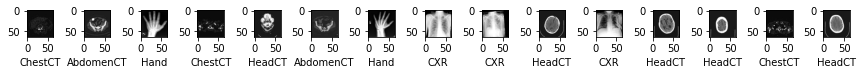

In [39]:
from PIL import Image
plt.subplots(1, 5, figsize=(12, 12))

for i,k in enumerate(np.random.randint(totalNum, size=15)):
    img = Image.open(imageFileList[k])
    arr = np.array(img)
    plt.subplot(1, 15, i + 1)
    plt.xlabel(classNames[imageLabelList[k]])
    plt.imshow(arr, cmap='gray')
plt.tight_layout()
plt.show()

In [27]:
import cv2

testFracData = 0.30
trainX, trainY = [], []
testX, testY = [], []

for i in range(totalNum):
    ran = np.random.random()
    if ran < testFracData:
        testX.append(cv2.imread(imageFileList[i]))
        testY.append(imageLabelList[i])
    else:
        trainX.append(cv2.imread(imageFileList[i]))
        trainY.append(imageLabelList[i])

print("Training data =",len(trainX), "\nTesting data =",len(testX))

Training data = 34939 
Testing data = 15061


In [29]:
from tensorflow.keras.utils import to_categorical

trainX = np.array(trainX)
trainY = np.array(trainY)
testX  = np.array(testX)
testY  = np.array(testY)
print(type(trainX))

trainY = to_categorical(trainY, classCount)
testY = to_categorical(testY, classCount)
testY

<class 'numpy.ndarray'>


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255
print("trainX shape:", trainX.shape, "train shape:", trainY.shape)

trainX shape: (34939, 64, 64, 3) train shape: (34939, 5)


In [31]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2097216   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [32]:
# compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
modelLog=model.fit(trainX, trainY,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.20)

Epoch 1/10
466/466 [==============================] - 129s 273ms/step - loss: 0.2154 - accuracy: 0.9250 - val_loss: 5.6945 - val_accuracy: 0.0000e+00
Epoch 2/10
466/466 [==============================] - 122s 262ms/step - loss: 0.0675 - accuracy: 0.9768 - val_loss: 1.7572 - val_accuracy: 0.0000e+00
Epoch 3/10
466/466 [==============================] - 121s 260ms/step - loss: 0.0456 - accuracy: 0.9835 - val_loss: 1.5123 - val_accuracy: 0.1314
Epoch 4/10
466/466 [==============================] - 115s 246ms/step - loss: 0.0383 - accuracy: 0.9858 - val_loss: 2.7217 - val_accuracy: 0.0225
Epoch 5/10
466/466 [==============================] - 113s 243ms/step - loss: 0.0643 - accuracy: 0.9750 - val_loss: 1.9792 - val_accuracy: 0.2008
Epoch 6/10
466/466 [==============================] - 111s 238ms/step - loss: 0.0397 - accuracy: 0.9838 - val_loss: 2.5201 - val_accuracy: 0.0501
Epoch 7/10
466/466 [==============================] - 112s 241ms/step - loss: 0.0342 - accuracy: 0.9869 - val_loss: 

In [34]:
testPred = model.predict(testX)
testPredLabels = np.argmax(testPred, axis=1)
testTrueLabels = np.argmax(testY, axis=1)

confusionMatrix = confusion_matrix(testTrueLabels, testPredLabels)

print(confusionMatrix)

471/471 [==============================] - 18s 37ms/step
[[3054    0    0    0    0]
 [   0 2985    0    7    0]
 [   0    0 3026    0    0]
 [   0    4    0 3005    0]
 [   0    0    1 1307 1672]]


In [35]:
print(classification_report(testTrueLabels,testPredLabels, target_names=classNames,digits=5))

              precision    recall  f1-score   support

   AbdomenCT    1.00000   1.00000   1.00000      3054
         CXR    0.99866   0.99766   0.99816      2992
     ChestCT    0.99967   1.00000   0.99983      3026
        Hand    0.69576   0.99867   0.82014      3009
      HeadCT    1.00000   0.56107   0.71883      2980

    accuracy                        0.91242     15061
   macro avg    0.93882   0.91148   0.90739     15061
weighted avg    0.93888   0.91242   0.90804     15061

